In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import sprinter
import getpass

In [3]:
qfib_dir = '/home/'+getpass.getuser()+'/Dropbox/TRAKODATA/AnatomicalTracts_TCK/'
qfib_ext = '.tck'
dpy_dir = '/home/'+getpass.getuser()+'/Dropbox/TRAKODATA/AnatomicalTracts_TCK/'
dpy_ext = '.tck'
tko_dir = '/home/'+getpass.getuser()+'/Dropbox/TRAKODATA/AnatomicalTracts_VTK/'
tko_ext = '.vtk'

files = []#['CA', 'CC', 'CP']
for f in os.listdir(tko_dir):
    if f.endswith('vtk'):
        files.append(f.split('.')[0])
        
# files = files[0:2]

input_size = 0
for f in files:
    print(os.path.join(tko_dir, f+tko_ext), os.path.getsize(os.path.join(tko_dir, f+tko_ext)))
    input_size += os.path.getsize(os.path.join(tko_dir, f+tko_ext))
input_size /= float(len(files))

qfib_files = [(qfib_dir, f+qfib_ext) for f in files]
qfib_bits = [8, 16]
tko_files = [(tko_dir, f+tko_ext) for f in files]
tko_bits = [9,10]
dpy_files =  [(dpy_dir, f+dpy_ext) for f in files]


/home/haehn/Dropbox/TRAKODATA/AnatomicalTracts_VTK/T_SO_left.vtk 15628
/home/haehn/Dropbox/TRAKODATA/AnatomicalTracts_VTK/T_Sup-PT_left.vtk 249927
/home/haehn/Dropbox/TRAKODATA/AnatomicalTracts_VTK/T_TO_left.vtk 69570
/home/haehn/Dropbox/TRAKODATA/AnatomicalTracts_VTK/T_EmC_right.vtk 49816
/home/haehn/Dropbox/TRAKODATA/AnatomicalTracts_VTK/T_CC1_comm.vtk 38287
/home/haehn/Dropbox/TRAKODATA/AnatomicalTracts_VTK/T_TP_left.vtk 74647
/home/haehn/Dropbox/TRAKODATA/AnatomicalTracts_VTK/T_CPC_left.vtk 77
/home/haehn/Dropbox/TRAKODATA/AnatomicalTracts_VTK/T_CR-F_right.vtk 141582
/home/haehn/Dropbox/TRAKODATA/AnatomicalTracts_VTK/T_Sup-T_left.vtk 162987
/home/haehn/Dropbox/TRAKODATA/AnatomicalTracts_VTK/T_CR-P_right.vtk 12007
/home/haehn/Dropbox/TRAKODATA/AnatomicalTracts_VTK/T_Sup-OT_right.vtk 78576
/home/haehn/Dropbox/TRAKODATA/AnatomicalTracts_VTK/T_ICP_left.vtk 24194
/home/haehn/Dropbox/TRAKODATA/AnatomicalTracts_VTK/T_EC_left.vtk 29694
/home/haehn/Dropbox/TRAKODATA/AnatomicalTracts_VTK/T_C

In [4]:
files

['T_SO_left',
 'T_Sup-PT_left',
 'T_TO_left',
 'T_EmC_right',
 'T_CC1_comm',
 'T_TP_left',
 'T_CPC_left',
 'T_CR-F_right',
 'T_Sup-T_left',
 'T_CR-P_right',
 'T_Sup-OT_right',
 'T_ICP_left',
 'T_EC_left',
 'T_CR-F_left',
 'T_CC4_comm',
 'T_Sup-PT_right',
 'T_SF_left',
 'T_CB_right',
 'T_Sup-P_right',
 'T_CC5_comm',
 'T_SLF-III_right',
 'T_TF_left',
 'T_MdLF_right',
 'T_Sup-OT_left',
 'T_SLF-I_left',
 'T_SLF-II_right',
 'T_Sup-P_left',
 'T_Sup-T_right',
 'T_SO_right',
 'T_Intra-CBLM-PaT_left',
 'T_SLF-III_left',
 'T_CC3_comm',
 'T_Sup-O_left',
 'T_ILF_right',
 'T_CC2_comm',
 'T_Sup-F_left',
 'T_AF_left',
 'T_CPC_right',
 'T_SF_right',
 'T_CB_left',
 'T_Sup-F_right',
 'T_Sup-PO_left',
 'T_Intra-CBLM-I&P_right',
 'T_CST_right',
 'T_UF_left',
 'T_PLIC_right',
 'T_ICP_right',
 'T_AF_right',
 'T_MCP_comm',
 'T_Sup-FP_left',
 'T_TF_right',
 'T_Sup-O_right',
 'T_TO_right',
 'T_IOFF_right',
 'T_SP_right',
 'T_Intra-CBLM-I&P_left',
 'T_MdLF_left',
 'T_CC7_comm',
 'T_CC6_comm',
 'T_Intra-CBLM-PaT

In [5]:
dpy_sizes, dpy_errors, dpy_stds, dpy_advstats = sprinter.Sprinter.run_dpy(qfib_files)

In [15]:
qfib_sizes, qfib_errors, qfib_stds, qfib_advstats = sprinter.Sprinter.run_qfib(qfib_files, qfib_bits)

In [16]:
runs = {}

In [17]:
config = {
    'POSITION': {
        'position':True,
        'sequential':True,
        'quantization_bits':None,
        'compression_level':10,
        'quantization_range':-1,
        'quantization_origin':None
    },
    'INDICES': {
        'position':False,
        'sequential':True,
        'quantization_bits':None,
        'compression_level':10,
        'quantization_range':-1,
        'quantization_origin':None
    },
    'name': 'qbi{bits}'
}
tko_sizes, tko_errors, tko_stds, tko_advstats = sprinter.Sprinter.run_trako(config, tko_files, tko_bits, binary=False)
runs[config['name']] = [tko_sizes, tko_errors, tko_stds, tko_advstats]

/home/haehn/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \
/home/haehn/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \
/home/haehn/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In futur

Failing..
Failing..


/home/haehn/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \
/home/haehn/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \
/home/haehn/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In futur

/home/haehn/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \
/home/haehn/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \
/home/haehn/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In futur

/home/haehn/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \
/home/haehn/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \
/home/haehn/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In futur

Failing..
Failing..


/home/haehn/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \
/home/haehn/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \
/home/haehn/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In futur

/home/haehn/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \
/home/haehn/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \
/home/haehn/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In futur

/home/haehn/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \
/home/haehn/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \
/home/haehn/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In futur

/home/haehn/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \
/home/haehn/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \
/home/haehn/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In futur

In [18]:
config = {
    'POSITION': {
        'position':True,
        'sequential':True,
        'quantization_bits':None,
        'compression_level':10,
        'quantization_range':-1,
        'quantization_origin':None
    },
    'INDICES': {
        'position':False,
        'sequential':True,
        'quantization_bits':None,
        'compression_level':10,
        'quantization_range':-1,
        'quantization_origin':None
    },
    'name': 'qbi{bits}_binary'
}
tko_sizes, tko_errors, tko_stds, tko_advstats = sprinter.Sprinter.run_trako(config, tko_files, tko_bits, binary=True)
runs[config['name']] = [tko_sizes, tko_errors, tko_stds, tko_advstats]

/home/haehn/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \
/home/haehn/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \
/home/haehn/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In futur

Failing..
Failing..


/home/haehn/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \
/home/haehn/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \
/home/haehn/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In futur

/home/haehn/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \
/home/haehn/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \
/home/haehn/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In futur

/home/haehn/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \
/home/haehn/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \
/home/haehn/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In futur

Failing..
Failing..


/home/haehn/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \
/home/haehn/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \
/home/haehn/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In futur

/home/haehn/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \
/home/haehn/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \
/home/haehn/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In futur

/home/haehn/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \
/home/haehn/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \
/home/haehn/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In futur

/home/haehn/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \
/home/haehn/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \
/home/haehn/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In futur

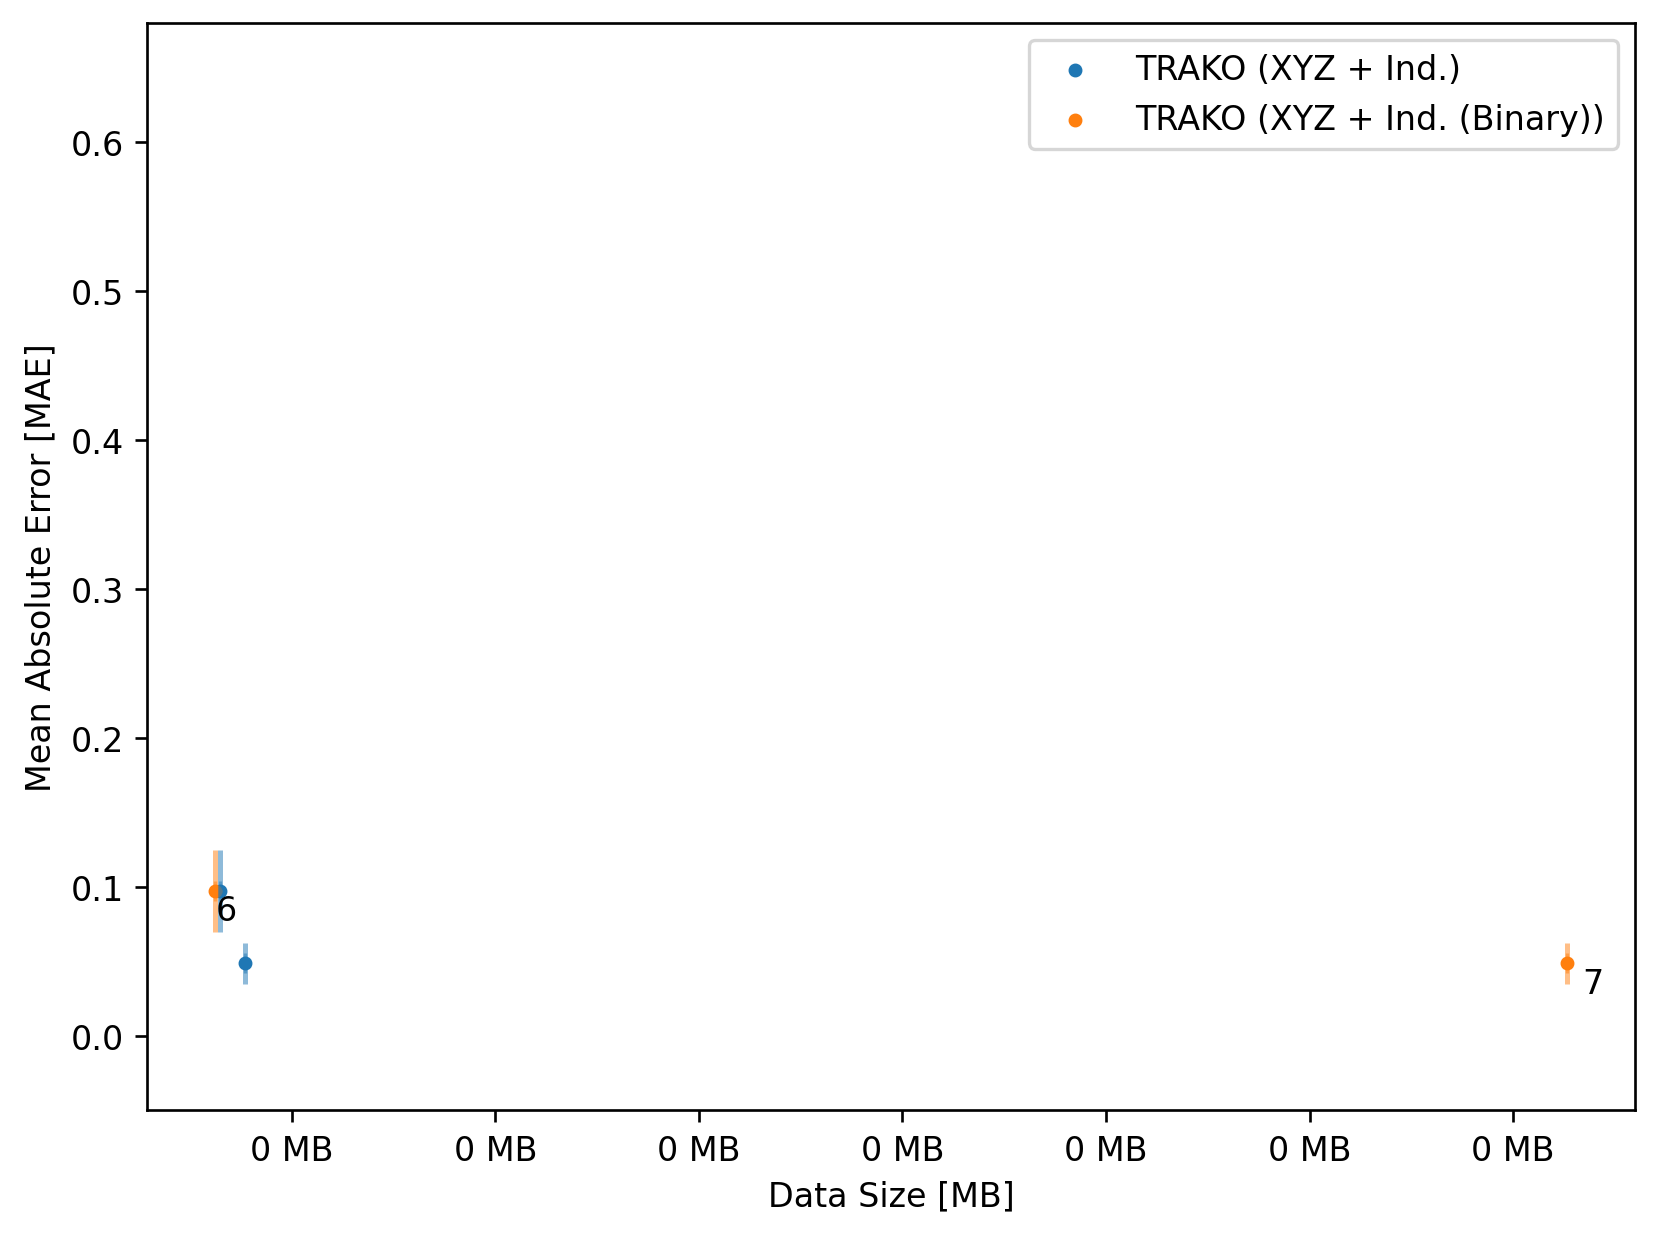

In [19]:
# sprinter.Sprinter.bitsplot(plt, tkoruns=runs, qfibruns=[qfib_sizes, qfib_errors, qfib_stds], ylim=(0,1), filename='/tmp/out.pdf')
sprinter.Sprinter.bitsplot(plt, tkoruns=runs, ylim=(-.05,.68), filename='/tmp/HPC_Full.pdf')

In [20]:
print(input_size/1000000)

0.150287


In [21]:
qfib_sizes, qfib_errors, qfib_stds, qfib_advstats = sprinter.Sprinter.run_qfib(qfib_files, qfib_bits)

In [22]:
sprinter.Sprinter.createtable('qfib-data', input_size, {'qfib': [qfib_sizes, qfib_errors, qfib_stds, qfib_advstats]}, selector=1)

--------------------
qfib
size 12982.297297297297
ratio 91.36166315296911
c_factor 11.576302449281247
min_e 0.0
max_e 116.186
mean_e 0.45633595477084854
std 0.3208439827368066
e_min_e 0.0
e_max_e 116.186
e_mean_e 0.4506437647584322
e_std 0.4506437647584322
c_time 9.571385622024536
d_time 3.1369340419769287
--------------------
~~~qfib & 0.0 & 91.362$\times$ & 11.576\% & 0.0 & 116.186 & 0.456$\pm$0.321 & 0.0 & 116.186 & 0.451$\pm$0.451 & 9.571 & 3.137\\


In [23]:
sprinter.Sprinter.createtable('qfib-data', input_size, {'dpy': [dpy_sizes, dpy_errors, dpy_stds, dpy_advstats]}, selector=0)

--------------------
dpy
size 5724808
ratio -3709.2503010905803
c_factor 0.026251884779367272
min_e 0.0
max_e 0
mean_e 0
std 0
e_min_e 0.0
e_max_e 0
e_mean_e 0.0
e_std 0.0
c_time 0
d_time 0
--------------------
~~~dpy & 6.0 & -3709.25$\times$ & 0.026\% & 0.0 & 0 & 0.0$\pm$0.0 & 0.0 & 0 & 0.0$\pm$0.0 & 0 & 0\\


In [26]:
sprinter.Sprinter.createtable('qfib-data', input_size, runs, selector=0)

--------------------
qbi{bits}
size 12946.583333333334
ratio 91.38542699412902
c_factor 11.608236407288924
min_e 0.0013138106
max_e 0.2695631
mean_e 0.0973879165119595
std 0.027731029096887343
e_min_e 0.005328792
e_max_e 0.2471839
e_mean_e 0.0968027717123429
e_std 0.015792041771217354
c_time 0.9228849411010742
d_time 0.9491884708404541
--------------------
~~~XYZ + Ind. & 0.0 & 91.385$\times$ & 11.608\% & 0.001 & 0.27 & 0.097$\pm$0.028 & 0.005 & 0.247 & 0.097$\pm$0.016 & 0.923 & 0.949\\
--------------------
qbi{bits}_binary
size 12427.25
ratio 91.73098804287795
c_factor 12.093343257760164
min_e 0.0013138106
max_e 0.2695631
mean_e 0.0973879165119595
std 0.027731029096887343
e_min_e 0.005328792
e_max_e 0.2471839
e_mean_e 0.0968027717123429
e_std 0.015792041771217354
c_time 1.3144822120666504
d_time 1.205946922302246
--------------------
~~~XYZ + Ind. (Binary) & 0.0 & 91.731$\times$ & 12.093\% & 0.001 & 0.27 & 0.097$\pm$0.028 & 0.005 & 0.247 & 0.097$\pm$0.016 & 1.314 & 1.206\\
